In [5]:
# Cài yfinance nếu chưa cài
!pip install yfinance --quiet

# Import thư viện yfinance
import yfinance as yf

# Tải dữ liệu cổ phiếu Tesla từ 1/1/2020 đến 1/1/2021
tesla_data = yf.download('TSLA', start='2020-01-01', end='2021-01-01')

# Reset lại index (chuyển ngày về cột bình thường)
tesla_data.reset_index(inplace=True)

# Hiển thị 5 dòng đầu tiên
tesla_data.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21088\2480956671.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2020-01-01', end='2021-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [ ]:
# Hiển thị 5 dòng cuối của dataframe tesla_revenue
tesla_revenue.tail()


In [7]:
# Import thư viện
import yfinance as yf

# Tải dữ liệu cổ phiếu GME từ Yahoo Finance
gme_data = yf.download('GME', start='2020-01-01', end='2021-01-01')

# Reset index để ngày tháng không còn là chỉ mục
gme_data.reset_index(inplace=True)

# Hiển thị 5 dòng đầu tiên
gme_data.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21088\1211276383.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2020-01-01', end='2021-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400
1,2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600
2,2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200
3,2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000
4,2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Lấy dữ liệu từ MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Tìm bảng doanh thu
tables = soup.find_all("table")
for table in tables:
    if "GameStop Annual Revenue" in str(table):
        revenue_table = table
        break

# Tạo dataframe từ bảng HTML
gme_revenue = pd.read_html(str(revenue_table))[0]

# Đổi tên cột nếu cần
gme_revenue.columns = ["Date", "Revenue"]

# Xóa dòng trống hoặc Revenue bị '-' hoặc NaN
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "-"]
gme_revenue.dropna(inplace=True)

# Xem 5 dòng cuối
gme_revenue.tail()


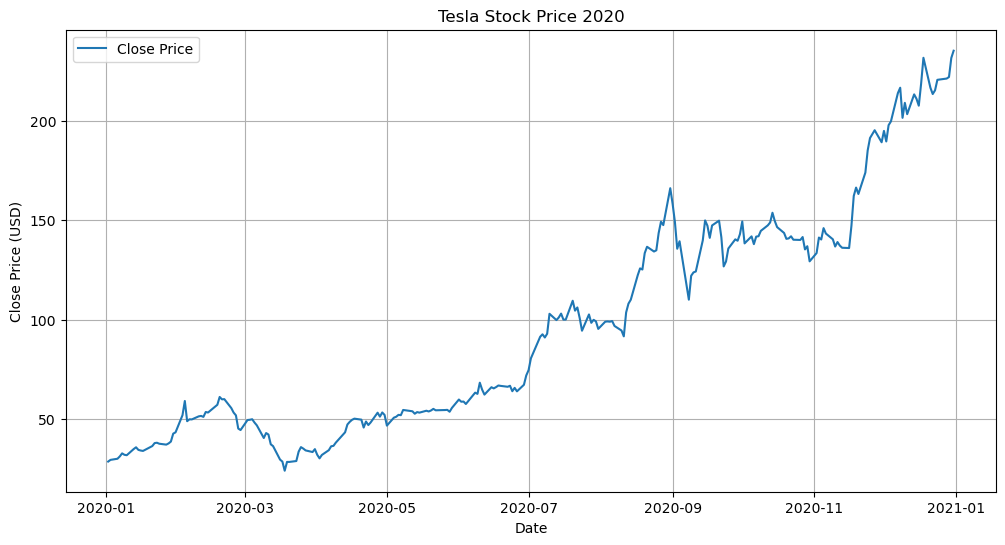

In [9]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
make_graph(tesla_data, "Tesla Stock Price 2020")


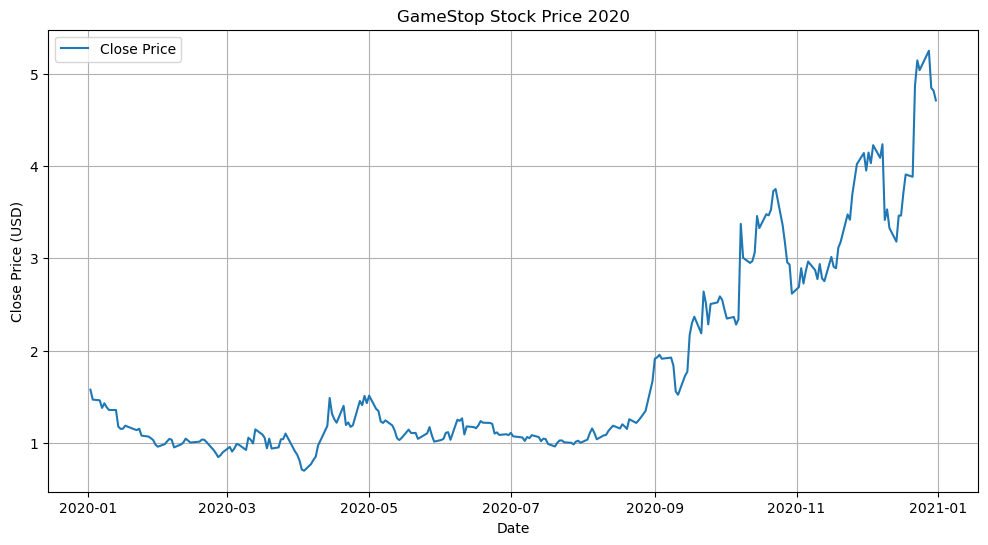

In [10]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Gọi hàm với dữ liệu GameStop
make_graph(gme_data, "GameStop Stock Price 2020")
